## Data Model
Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

## Load dataset

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Overview of the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


##### It seems that this dataset doesn't havy any null values

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


##### - Min and max values for satisfaction_level and last_evaluation seem to be correct. 
##### - The max for average_monthly_hours seems a little high

## Clean dataset

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Renaming some columns

In [6]:
df0.rename(columns={'Work_accident': 'work_accident', 'Department' : 'department',
                    'average_montly_hours' : 'average_monthly_hours'}, inplace=True)
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking for missing values just in case

In [7]:
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Checking for duplicates

In [8]:
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

##### It seems there are duplicates in the data.

In [9]:
df0[df0.duplicated]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


##### Around 20% of the data is duplicated.

##### Since there's no specific order, identifier or value in the index, we can reset it without it affecting any future processes.

In [10]:
df1 = df0.drop_duplicates()
df1.reset_index(inplace=True, drop=True)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Checking balance

In [11]:
df1.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
0,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,1991,1991,1991,1991,1991,1991,1991,1991,1991


In [12]:
grouped_df = df1.groupby('left').count()
grouped_df.reset_index(inplace=True)
grouped_df = grouped_df[['left', 'satisfaction_level']]

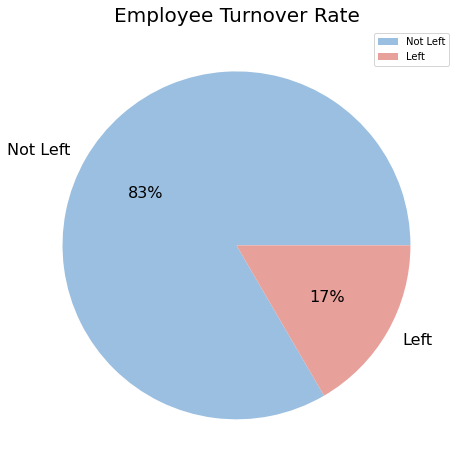

In [13]:
plt.figure(figsize=(8,8))
plt.pie(x=grouped_df['satisfaction_level'],
        colors=['#9BBFE0', '#E8A09A'],
        labels=['Not Left', 'Left'],
        autopct='%.0f%%',
       textprops={'fontsize':16,
                 'color':'Black'})
plt.legend()
plt.title(label='Employee Turnover Rate', fontdict= {'fontsize': 20,
 'fontweight' : 10,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'})
plt.show()

##### The balance is about 17% (left) to 83% (didn't leave). This rate is good enough for the time being (for model building purposes).

### Checking for outliers

<AxesSubplot: title={'center': 'Tenure'}, xlabel='time_spend_company'>

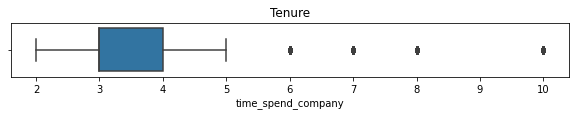

In [14]:
plt.figure(figsize=(10,1))
plt.title('Tenure')
sbn.boxplot(x=df1['time_spend_company'])

##### We can see that most employees fall within 2-5 years within the company, but some of them remain up to 10 years. Let's take a look.

Text(0.5, 1.0, 'Tenure histogram')

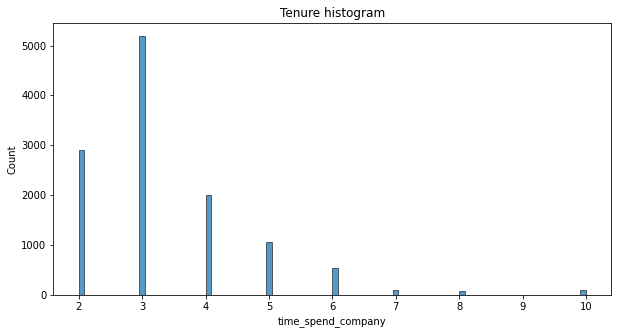

In [15]:
plt.figure(figsize=(10,5))
sbn.histplot(df1['time_spend_company'])
plt.title('Tenure histogram')

##### The number of outliers seems pretty low except on year 6. Let's determine the total just in case.

In [16]:
outliers_no = df1[df1['time_spend_company'] > 5].count().unique()[0]

In [17]:
total_no = df1.count().unique()[0]

In [18]:
print('Total outliers: {}'.format(outliers_no))
print('Outliers percentage: %{}'.format((outliers_no/total_no)*100))

Total outliers: 824
Outliers percentage: %6.8718205320657155


##### Almost 7% of our data is made of outliers, so that's something that should be considered when building our model.
##### Having said that, these values seem valuable to future calculations. Moreover, they seem to not be errors.

##### Average monthly hours

Text(0.5, 1.0, 'Average monthly hours')

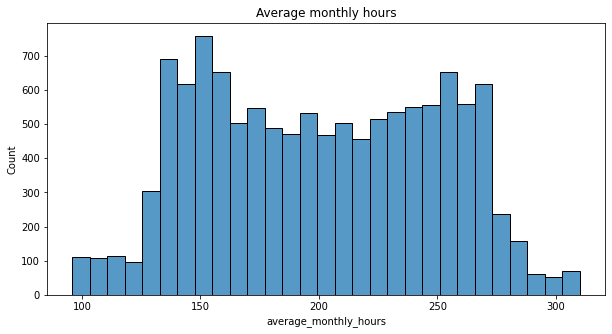

In [19]:
plt.figure(figsize=(10,5))
sbn.histplot(df1['average_monthly_hours'])
plt.title('Average monthly hours')

##### People who stayed and left

In [20]:
stay_no = df1[df1['left'] == 0].count().unique()[0]

In [21]:
left_no = df1[df1['left'] == 1].count().unique()[0]

In [22]:
print('Total employees: {}'.format(left_no + stay_no))
print('Number of people who left: {}'.format(left_no))
print('Percentage of people who left: %{}'.format((left_no/(left_no + stay_no))*100))

Total employees: 11991
Number of people who left: 1991
Percentage of people who left: %16.604119756484028


##### Almost 17% of people left the company, that's a significant amount.

## Relations between variables

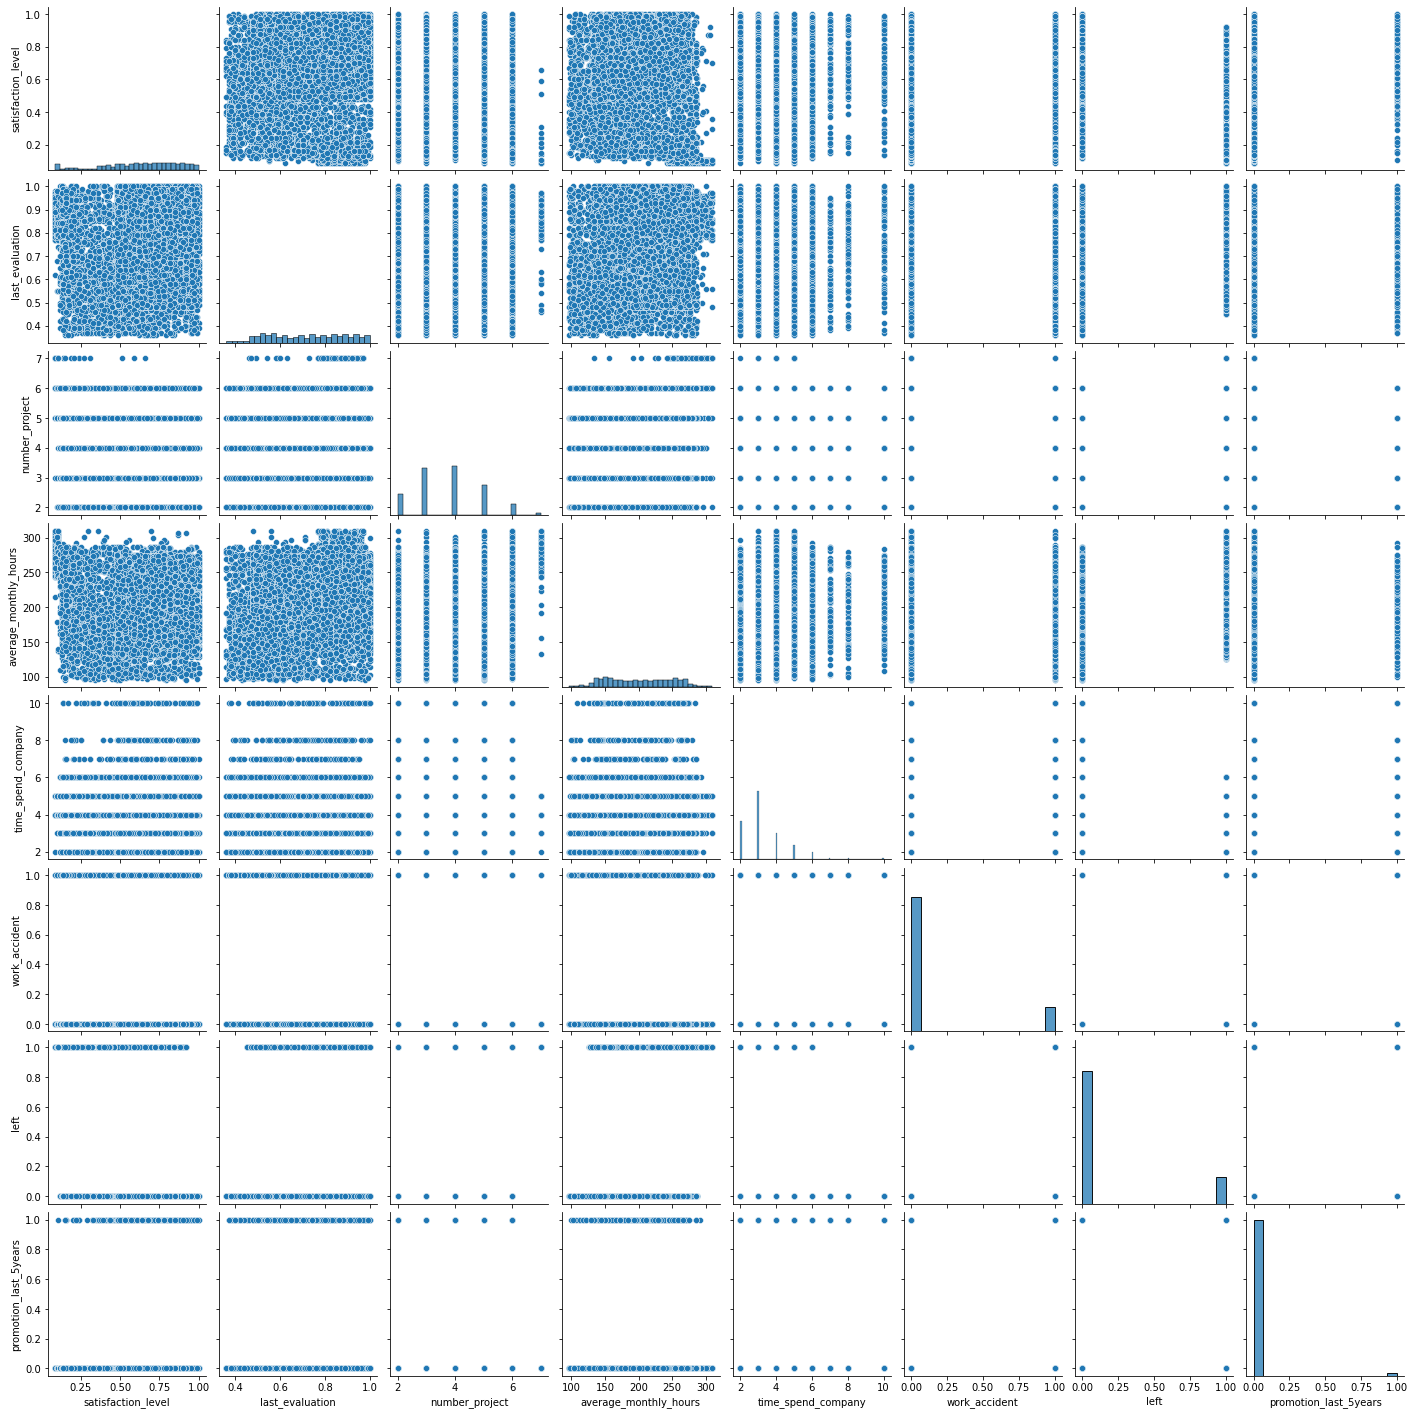

In [23]:
sbn.pairplot(df1)

##### These graphs aren't really helpful as they are, so let's dive deeper into each metric and dimension.

### Department on turnover rate

In [24]:
df_left_by_department = df1[['department', 'left']].groupby(['department']).agg({'left': ['sum', 'count']})

In [25]:
df_left_by_department.reset_index(inplace=True)

In [26]:
df_left_by_department = df_left_by_department.droplevel(0, axis=1)

In [27]:
df_left_by_department['Percentage'] = df_left_by_department['sum'] / df_left_by_department['count']

In [28]:
df_left_by_department

,,sum,count,Percentage
0,IT,158,976,0.161885
1,RandD,85,694,0.122478
2,accounting,109,621,0.175523
3,hr,113,601,0.188020
4,management,52,436,0.119266
5,marketing,112,673,0.166419
6,product_mng,110,686,0.160350
7,sales,550,3239,0.169805
8,support,312,1821,0.171334
9,technical,390,2244,0.173797


(0.0, 1.0)

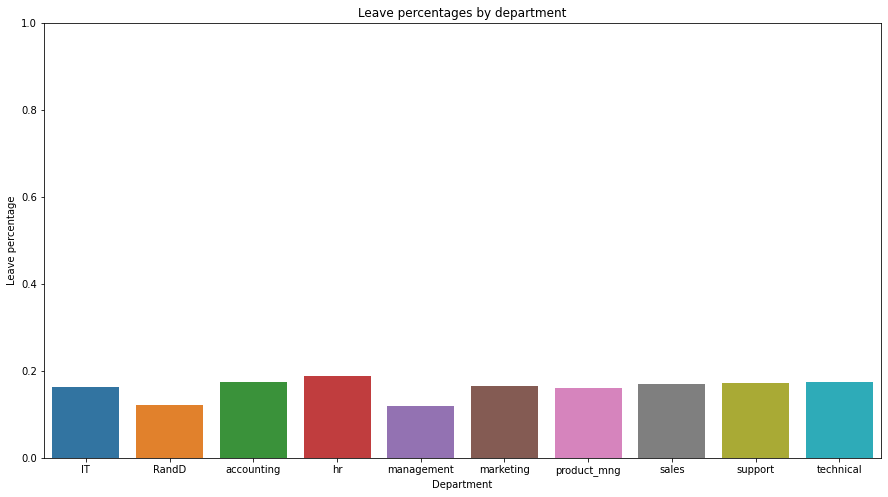

In [29]:
plt.figure(figsize=(15,8))
ax = sbn.barplot(x='', y='Percentage', data=df_left_by_department).set_ylabel('Percentage')
plt.title('Leave percentages by department')
plt.xlabel('Department')
plt.ylabel('Leave percentage')
plt.ylim([0,1])

##### We can see that the percentages for people who left don't vary that much among different departments.

### Salary on turnover rate

In [30]:
df_left_by_salary = df1[['salary', 'left']].groupby(['salary']).agg({'left': ['sum', 'count']})
df_left_by_salary.reset_index(inplace=True)
df_left_by_salary = df_left_by_salary.droplevel(0, axis=1)
df_left_by_salary['Percentage'] = df_left_by_salary['sum'] / df_left_by_salary['count']
df_left_by_salary

,,sum,count,Percentage
0,high,48,990,0.048485
1,low,1174,5740,0.204530
2,medium,769,5261,0.146170


##### The difference on salaries already seems significant, let's visualize it

In [31]:
df_left_by_salary.sort_values('Percentage', inplace=True)

(0.0, 1.0)

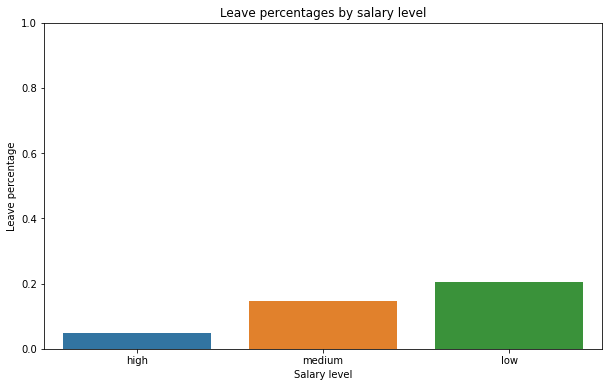

In [32]:
plt.figure(figsize=(10,6))
ax = sbn.barplot(x='', y='Percentage', data=df_left_by_salary).set_ylabel('Percentage')
plt.title('Leave percentages by salary level')
plt.xlabel('Salary level')
plt.ylabel('Leave percentage')
plt.ylim([0,1])

##### - People with high salaries show a 5% leaving rate
##### - People with medium salaries show a 15% leaving rate
##### - People with low salaries show a 20% leaving rate

In [33]:
total_left = df_left_by_salary['sum'].sum()
total_employees = df_left_by_salary['count'].sum()

In [34]:
df_left_by_salary['percentage_of_left_over_total_left'] = df_left_by_salary['sum']/total_left
df_percentage_left_by_salary = df_left_by_salary[['', 'percentage_of_left_over_total_left']]
df_percentage_left_by_salary

,,percentage_of_left_over_total_left
0,high,0.024108
2,medium,0.386238
1,low,0.589653


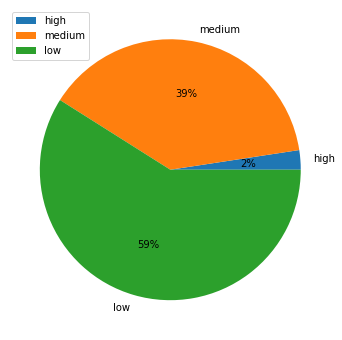

In [35]:
plt.figure(figsize=(10,6))
plt.pie(x=df_percentage_left_by_salary['percentage_of_left_over_total_left'], 
        labels=df_percentage_left_by_salary[''],
        autopct='%.0f%%')
plt.legend(loc='upper left')
plt.show()

##### It's visible already that the leave rates are related to the salary level. 
##### - 59% of the people who left had low salaries
##### - 39% of the people who left had medium salaries
##### - 2% of the people who left had high salaries

### Accidents on leaving rate

In [36]:
df_left_by_accident = df1[['work_accident', 'left']].groupby(['work_accident']).agg({'left': ['sum', 'count']})
df_left_by_accident.reset_index(inplace=True)
df_left_by_accident = df_left_by_accident.droplevel(0, axis=1)
df_left_by_accident['Percentage'] = df_left_by_accident['sum'] / df_left_by_accident['count']
df_left_by_accident

,,sum,count,Percentage
0,0,1886,10141,0.185978
1,1,105,1850,0.056757


##### - Around 19% of the people who didn't have an accident left
##### - Around 6% of the people who did have an accident left

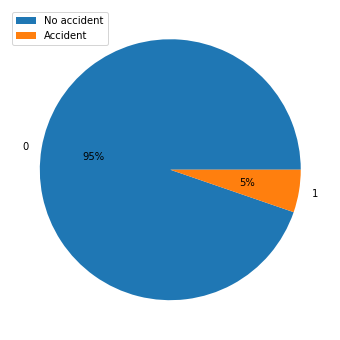

In [37]:
df_left_by_accident['percent_over_total_left'] = df_left_by_accident['sum']/total_left
df_left_by_accident[['', 'percent_over_total_left']]
plt.figure(figsize=(10,6))
plt.pie(x=df_left_by_accident['percent_over_total_left'], 
        labels=df_left_by_accident[''],
        autopct='%.0f%%')
plt.legend(['No accident', 'Accident'],loc='upper left')
plt.show()

##### Of the people that left, 95% of them were NOT involved in a work accident. Only 5% of the people that left were involved in a work accident.

In [38]:
accidents_no = df1[df1['work_accident'] == 1].count()[0]

In [39]:
print('Total employees: {}'.format(left_no + stay_no))
print('Number of people involved in a work accident: {}'.format(accidents_no))
print('Percentage of people involved a work accident: %{}'.format((accidents_no/(left_no + stay_no))*100))

Total employees: 11991
Number of people involved in a work accident: 1850
Percentage of people involved a work accident: %15.428237845050456


##### More than 15% of the employees were involved in a work accident. 

### Tenure

Text(0.5, 0, 'Tenure')

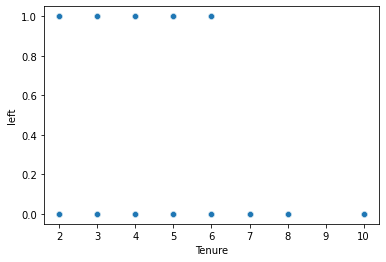

In [40]:
sbn.scatterplot(df1[['time_spend_company', 'left']], x=df1['time_spend_company'], y=df1['left']).set_xlabel('Tenure')

##### Although we still didn't dive into any numbers, we notice that no employee with more than 6 years within the company left.

In [41]:
df_by_tenure = df1[df1['time_spend_company'] <= 6]
df_left_by_tenure = df_by_tenure[df_by_tenure['left'] == 1]

Text(0.5, 0, 'Tenure')

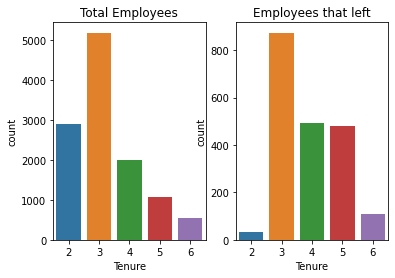

In [42]:
fig, ax =plt.subplots(1,2)
ax[0].set_title('Total Employees')
sbn.countplot(x='time_spend_company', data=df_by_tenure, ax=ax[0]).set_xlabel('Tenure')
ax[1].set_title('Employees that left')
sbn.countplot(x='time_spend_company', data=df_left_by_tenure, ax=ax[1]).set_xlabel('Tenure')

In [43]:
df_grouped_tenure = df1[['time_spend_company', 'left']].groupby(['time_spend_company']).agg({'left': ['sum', 'count']})
df_grouped_tenure.reset_index(inplace=True)
df_grouped_tenure = df_grouped_tenure.droplevel(0, axis=1)
df_grouped_tenure['Percentage'] = df_grouped_tenure['sum'] / df_grouped_tenure['count']
df_grouped_tenure

,,sum,count,Percentage
0,2,31,2910,0.010653
1,3,874,5190,0.168401
2,4,495,2005,0.246883
3,5,482,1062,0.453861
4,6,109,542,0.201107
5,7,0,94,0.000000
6,8,0,81,0.000000
7,10,0,107,0.000000


In [44]:
for num in range(len(df_grouped_tenure)):
    print('Total employees with {} years within the company: {}'.format(df_grouped_tenure[''][num], 
                                                                         df_grouped_tenure['count'][num]))
    print('Total employees that left with {} years within the company: {}'.format(df_grouped_tenure[''][num], 
                                                                         df_grouped_tenure['sum'][num]))
    print('Leave rate among employees with {} years within the company: {:.2%}'.format(df_grouped_tenure[''][num], 
                                                                         df_grouped_tenure['Percentage'][num]))
    print('')

Total employees with 2 years within the company: 2910
Total employees that left with 2 years within the company: 31
Leave rate among employees with 2 years within the company: 1.07%

Total employees with 3 years within the company: 5190
Total employees that left with 3 years within the company: 874
Leave rate among employees with 3 years within the company: 16.84%

Total employees with 4 years within the company: 2005
Total employees that left with 4 years within the company: 495
Leave rate among employees with 4 years within the company: 24.69%

Total employees with 5 years within the company: 1062
Total employees that left with 5 years within the company: 482
Leave rate among employees with 5 years within the company: 45.39%

Total employees with 6 years within the company: 542
Total employees that left with 6 years within the company: 109
Leave rate among employees with 6 years within the company: 20.11%

Total employees with 7 years within the company: 94
Total employees that left 

### Average hours per week on leave rate
##### First let's check the relation between amount of projects and average hours per week

In [45]:
df1['bool_left'] = df1['left'] == 1

C:\Users\atvid\AppData\Local\Temp\ipykernel_8080\4185958431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bool_left'] = df1['left'] == 1


<AxesSubplot: xlabel='average_monthly_hours', ylabel='number_project'>

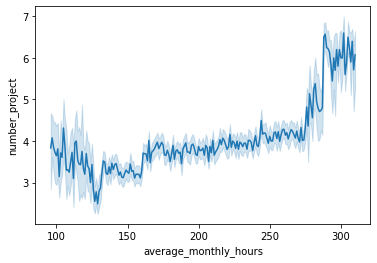

In [46]:
sbn.lineplot(x=df1['average_monthly_hours'], y=df1['number_project'])

##### Now let's breakout by employees who left

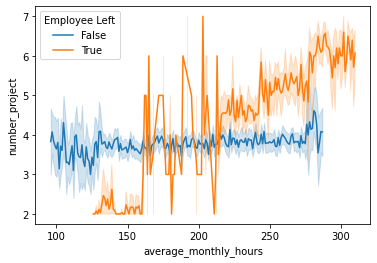

In [47]:
sbn.lineplot(x=df1['average_monthly_hours'], y=df1['number_project'], hue=df1['bool_left'])
plt.legend(title='Employee Left')

##### This is an interesting graphic. Among the workers that left, the more projects they had, the longer hours they worked.
##### Workers that didn't leave on the other hand have a consistent number of projects, unrelated to their average monthly hours

In [48]:
df_by_hours = df1[['average_monthly_hours', 'left']].groupby(['average_monthly_hours']).agg({'left': ['sum', 'count']})
df_by_hours.reset_index(inplace=True)
df_by_hours = df_by_hours.droplevel(0, axis=1)
df_by_hours['Percentage'] = df_by_hours['sum'] / df_by_hours['count']
df_by_hours

,,sum,count,Percentage
0,96,0,6,0.0
1,97,0,13,0.0
2,98,0,20,0.0
3,99,0,11,0.0
4,100,0,17,0.0
...,...,...,...,...
210,306,8,8,1.0
211,307,10,10,1.0
212,308,10,10,1.0
213,309,7,7,1.0


Text(0.5, 0, 'Average monthly hours')

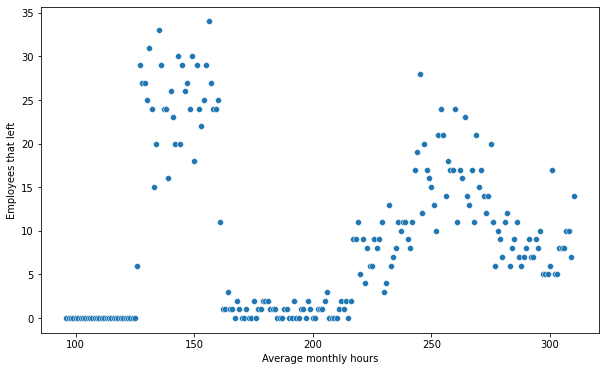

In [49]:
plt.figure(figsize=(10,6))
sbn.scatterplot(x=df_by_hours[''], y=df_by_hours['sum'])
plt.ylabel('Employees that left')
plt.xlabel('Average monthly hours')

##### There are 2 groups of people who left: the ones with way more than 200 hours monthly and the ones with around 150 hs. monthly.

### Promotion last 5 years on turnover rate

<AxesSubplot: xlabel='promotion_last_5years', ylabel='count'>

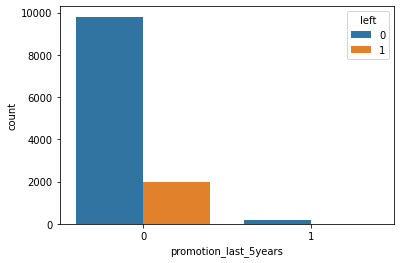

In [50]:
sbn.countplot(data=df1, x='promotion_last_5years', hue='left')

##### There's little people that received a promotion over the last 5 years (203 out of almost 12000 employees, less than 2%). If they do get a promotion, it seems they tend to stay.

In [51]:
df1[df1['promotion_last_5years'] == 0].groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,bool_left
left,,,,,,,,,,
0,9805,9805,9805,9805,9805,9805,9805,9805,9805,9805
1,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983


In [52]:
df1[df1['promotion_last_5years'] == 1].groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,bool_left
left,,,,,,,,,,
0,195,195,195,195,195,195,195,195,195,195
1,8,8,8,8,8,8,8,8,8,8


##### - Almost 18% of people who didn't get promoted over the last 5 years left.
##### - Less than a 4% of people who got promoted over the last 5 years left.

### Performance evaluation on turnover rate

<AxesSubplot: xlabel='average_monthly_hours', ylabel='last_evaluation'>

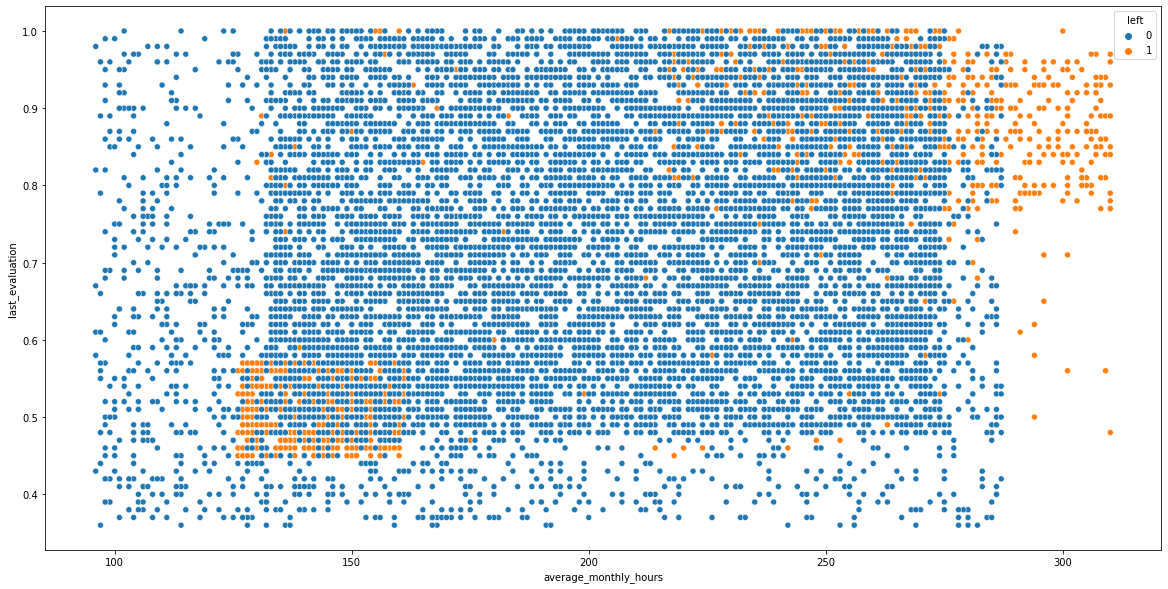

In [53]:
plt.figure(figsize=(20,10))
sbn.scatterplot(data=df1, y='last_evaluation', x='average_monthly_hours', hue='left')

##### We can see mainly 2 groups of people that left: people that spent a lot of hours and were recognized, and people who spent less hours but were not recognized

### Number of projects on turnover rate

<AxesSubplot: xlabel='number_project', ylabel='Count'>

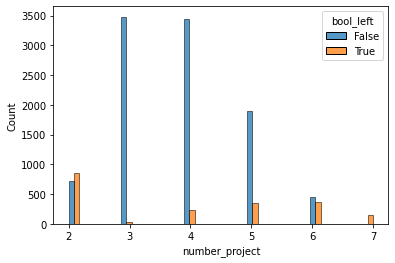

In [54]:
sbn.histplot(data=df1, x='number_project', hue='bool_left', stat='count', multiple='dodge')

##### It seems that people with 2 projects were very likely to leave. On the other hand, and starting from 3 projects, the more projects someone was assigned to, the higher their chances to leave are. People with 3 and 4 projects were the most likely to stay.

### Satisfaction level on turnover rate

In [55]:
df_by_satisfaction_level = df1[['satisfaction_level', 'left']].groupby(['satisfaction_level']).mean()
df_by_satisfaction_level.reset_index(inplace=True)
df_by_satisfaction_level

,satisfaction_level,left
0,0.09,1.000000
1,0.10,1.000000
2,0.11,1.000000
3,0.12,0.076923
4,0.13,0.022222
...,...,...
87,0.96,0.000000
88,0.97,0.000000
89,0.98,0.000000
90,0.99,0.000000


Text(0, 0.5, 'Percentage of people that left')

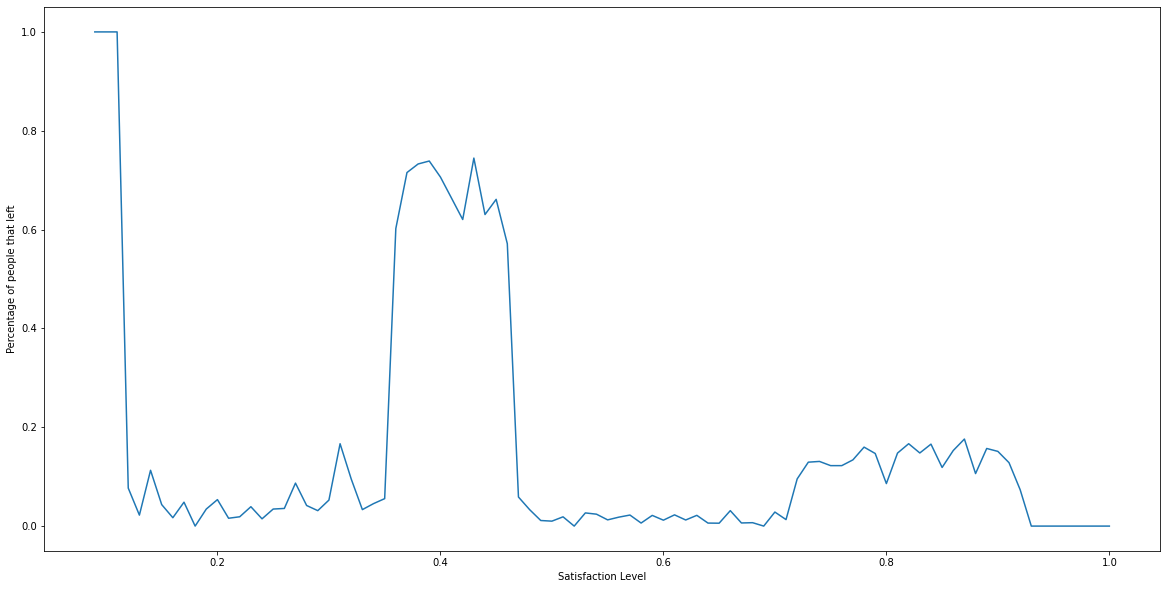

In [56]:
plt.figure(figsize=(20,10))
sbn.lineplot(data=df_by_satisfaction_level, x='satisfaction_level', y='left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage of people that left')

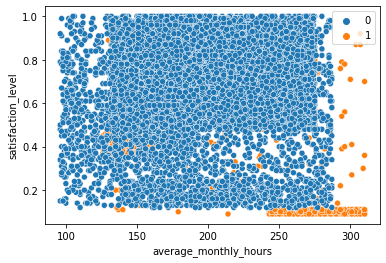

In [57]:
sbn.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left')
plt.legend(loc='upper right')

##### People with a lot of average monthly hours showed less satisfaction levels and were more likely to leave

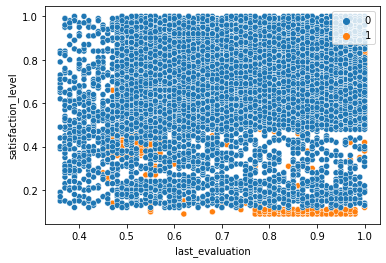

In [58]:
sbn.scatterplot(data=df1, x='last_evaluation', y='satisfaction_level', hue='left')
plt.legend(loc='upper right')

##### The group that was more likely to leave was people with high evaluation scores and low satisfaction levels

## Correlation heatmap

C:\Users\atvid\AppData\Local\Temp\ipykernel_8080\336540779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(df1.corr(), annot=True, cmap="Greens", fmt=".2f")


<AxesSubplot: >

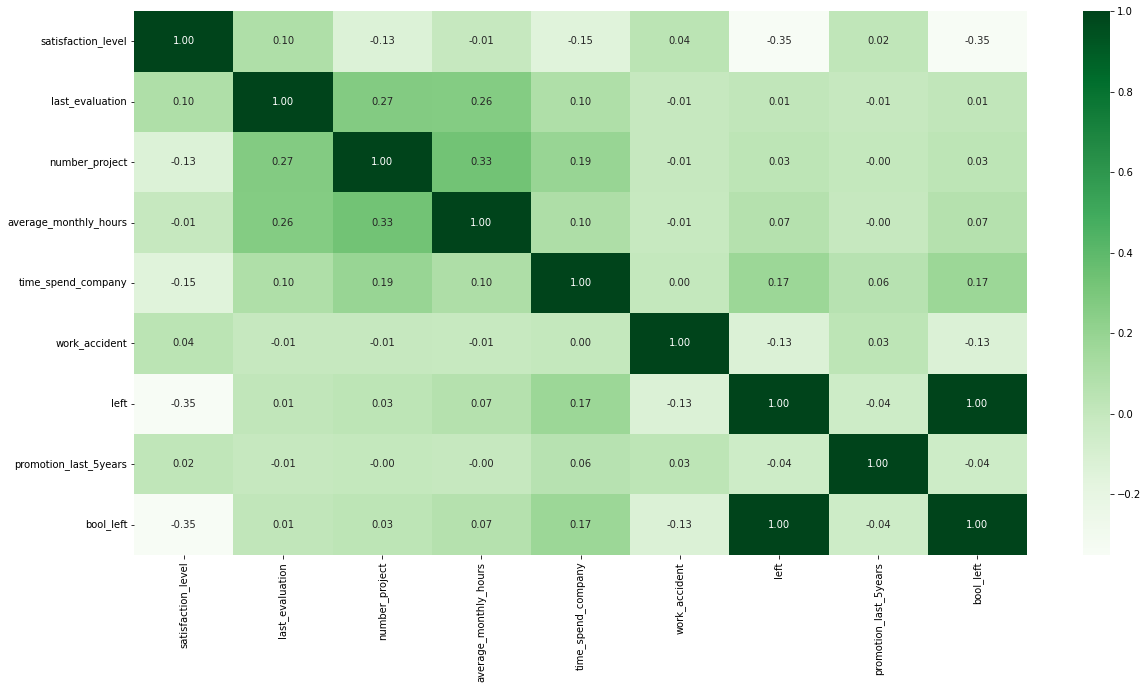

In [59]:
plt.figure(figsize=(20,10))
sbn.heatmap(df1.corr(), annot=True, cmap="Greens", fmt=".2f")

##### The 3 variables that seem the most correlated are the last evaluation, number of projects and average monthly hours. This makes sense and must be taken into account when developing a model
##### On the other hand, the satisfaction level has a high negative correlation with employees leaving (at a higher satisfaction level they're less likely to leave)

### Insights

##### - People that spend more than 6 years in the company are very unlikely to leave (no case has been recorded yet).
##### - People with only 2 projects or with too many projects are more likely to leave. Same with the average working hours. To minimize the chances of people leaving, balance should be seeked (e.g: 3/4 projects that take around 200 hours monthly).
##### - There's very little people that got promoted over the last 5 years. Promoting someone can reduce significantly their chances of leaving (14% less leave rate for people who got promoted).
##### - The leave rate seems the same across all departments.
##### - Work accidents don't seem to have a significant negative impact on the leave rate.

## Output df1 to build models

In [60]:
df1.drop('bool_left', axis=1, inplace=True)

C:\Users\atvid\AppData\Local\Temp\ipykernel_8080\368327226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('bool_left', axis=1, inplace=True)


In [61]:
df1.to_csv('clean_df.csv')